# Classification Part 1: KNN, Logistic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Credit Card Data

- Input: Student status (Yes or No), Balance, Income
- Output: Default (Yes or No)

## Data Description

In [2]:
import ISLP
Default = ISLP.load_data("Default")
Default.head(3)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947


In [3]:
pd.get_dummies(Default['default'].astype('category'))

,No,Yes
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
9995,True,False
9996,True,False
9997,True,False
9998,True,False


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


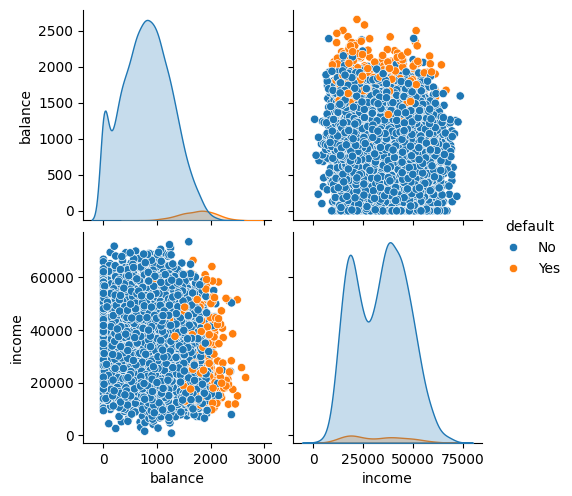

In [4]:
sns.pairplot(Default,hue='default',height=2.5) # Size is the size of the plot 
Default.head()

## Logistic Regression

Given a new $x$, estimate $P(Y=1|X=x)$ and predict $Y=1$ if $P(Y=1|X=x)$ is large. (underlying idea: Bayes classifier)

GLM 을 쓸 수 있는 ``statsmodels.formula.api.smf.glm`` 함수를 사용하자.

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


model = smf.glm(formula = 'default ~ student', data=Default, family=sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                        
===========================================================================================
Dep. Variable:     ['default[No]', 'default[Yes]']   No. Observations:                10000
Model:                                         GLM   Df Residuals:                     9998
Model Family:                             Binomial   Df Model:                            1
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -1454.3
Date:                             Sat, 09 Aug 2025   Deviance:                       2908.7
Time:                                     09:47:15   Pearson chi2:                 1.00e+04
No. Iterations:                                  6   Pseudo R-squ. (CS):           0.001196
Covariance Type:                         nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5041      0.071     49.554      0.000       3.366       3.643
student[T.Yes]    -0.4049      0.115     -3.520      0.000      -0.630      -0.179
==================================================================================
"""

In [6]:
pred = model.predict()
pred


array([0.97080499, 0.95686141, 0.97080499, ..., 0.97080499, 0.97080499,
       0.95686141], shape=(10000,))

대부분의 확률이 1에 가깝다. **Default 는 No, Yes 인데 어떤게 1로 코딩 된 것일까?** 어떻게 계산됐느냐에 따라 해석이 반대로 됨.

대부분의 데이터가 No 이기 때문에 No 가 Y=1 로 인코딩이 됐을 것으로 보인다. 

~~student status 가 Yes 일 때, ``Default`` 가 Yes 일 확률이 No 보다 더 작다.~~ : Yes 가 1로 encoding 됐을 경우

student status가 Yes 일 때, ``Default``가 No 일 확률이 Yes 보다 더 작다.: No가 1로, Yes가 0으로 인코딩.


해석의 피곤함을 덜기 위해 더미 인코딩 된 값을 response로 두자.

In [ ]:
Default['y'] = pd.get_dummies(Default['default'], drop_first=True)
Default.head(5) # Default="Yes" 가 y=1 로 처리된 것 확인 가능

,default,student,balance,income,y
0,No,No,729.526495,44361.625074,False
1,No,Yes,817.180407,12106.134700,False
2,No,No,1073.549164,31767.138947,False
3,No,No,529.250605,35704.493935,False
4,No,No,785.655883,38463.495879,False


In [8]:
Default['yy'] = [1 if x == "Yes" else 0 for x in Default['default']]
Default.head(5)
print(ISLP.__version__)

0.4.0


Student 의 경우 Yes가 무엇인지 명시돼있지만, 이 또한 더미 인코딩 된 변수를 미리 만들어두자. 후에 ``sklearn`` 기반 방법론 돌릴 때 같이 사용 예정.

In [9]:
Default['std'] = pd.get_dummies(Default['student'], drop_first=True)
Default.head(5) # Student="Yes" 가 y=1 로 처리된 것 확인 가능

,default,student,balance,income,y,yy,std
0,No,No,729.526495,44361.625074,False,0,False
1,No,Yes,817.180407,12106.134700,False,0,True
2,No,No,1073.549164,31767.138947,False,0,False
3,No,No,529.250605,35704.493935,False,0,False
4,No,No,785.655883,38463.495879,False,0,False


In [10]:
model = smf.glm(formula = 'y ~ std', data=Default, family=sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['y[False]', 'y[True]']   No. Observations:                10000
Model:                                 GLM   Df Residuals:                     9998
Model Family:                     Binomial   Df Model:                            1
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -1454.3
Date:                     Sat, 09 Aug 2025   Deviance:                       2908.7
Time:                             09:47:32   Pearson chi2:                 1.00e+04
No. Iterations:                          6   Pseudo R-squ. (CS):           0.001196
Covariance Type:                 nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.5041      0.071     49.554      0.000       3.366       3.643
std[T.True]    -0.4049      0.115     -3.520      0.000      -0.630      -0.179
===============================================================================
"""

이 모델의 경우, student 일 경우 채무불이행 (default=yes) 확률이 올라간다. 

Binary classification 에선 두가지 오류가 존재한다. (0을 1로, 1을 0으로). 자세히 확인하기 위해 confusion matrix 를 만들고, 여러가지 classification performance meausre를 확인해보자.

- ``sklearn.metrics.confusion_matrix(true, predicted)``: 첫번째 argument 가 row, 두번째 argument 가 matrix의 column 을 의미한다. 
- Accuracy: 전체 데이터 중 제대로 분류한 정도
- Sensitivity: Positive를 Positive로 분류한 정도
- Specificity: Negative를 Negative로 분류한 정도



In [11]:
# Fitted Logistic Regression Model을 통해 P(Y=1|X=x) 값을 확인.
pred = model.predict()


pred_class = [ "Yes" if x > 0.5 else "No" for x in pred]
cm1 = confusion_matrix(Default['default'],pred_class) 
print('Confusion Matrix : \n', cm1)
# Note: sensitivity & specificity might be replaced depending on your coding!!
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1 )


Confusion Matrix : 
 [[   0 9667]
 [   0  333]]
Accuracy :  0.0333
Sensitivity :  1.0
Specificity :  0.0


전체 정확도는 매우 높지만 Sensitivity = 0. 돈을 갚지 못할 사람을 전혀 detect 하지 못한다.
전체 데이터에서 Default 인 경우가 얼마나 되는지 확인해보자.

In [12]:
(Default['default']=='Yes').sum()/Default.shape[0]

np.float64(0.0333)

3.3% 로 매우 희귀환 확률. (Unbalanced). 단순히 모든 사람은 다 Default = No 라고 Prediction 할 경우 Accuracy(1-Training Error Rate)을 매우 높일 수 있다 (Training Error Rate을 매우 낮출 수 있다).

Creadit Card company 입장에서, 괜찮은가? 

High-risk individual 을 identify 하는게 더 중요! (높은 sensitivity 가 더 중요하다)

default 할 사람을 멀쩡하다고 할 오류에 대한 비용 >>> 멀쩡한 사람을 default 로 분류하는 오류에 대한 비용

다른 변수로 돌려보자.

In [13]:
def summary_logistic(fitted_model, true_class, thres):
    pred = fitted_model.predict()
    pred_class = [ "Yes" if x > thres else "No" for x in pred]
    cm1 = confusion_matrix(true_class,pred_class) 
    print('Confusion Matrix : \n', cm1)
    # Note: sensitivity & specificity might be replaced depending on your coding!!
    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    print ('Accuracy : ', accuracy1)

    sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity : ', sensitivity1)

    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity1 )

In [14]:
model = smf.glm(formula = 'y ~ balance', data=Default, family=sm.families.Binomial())
model = model.fit()
summary_logistic(model, Default['default'], 0.5)
model.summary()

Confusion Matrix : 
 [[  42 9625]
 [ 100  233]]
Accuracy :  0.0275
Sensitivity :  0.6996996996996997
Specificity :  0.004344677769732078


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['y[False]', 'y[True]']   No. Observations:                10000
Model:                                 GLM   Df Residuals:                     9998
Model Family:                     Binomial   Df Model:                            1
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -798.23
Date:                     Sat, 09 Aug 2025   Deviance:                       1596.5
Time:                             09:47:35   Pearson chi2:                 7.15e+03
No. Iterations:                          9   Pseudo R-squ. (CS):             0.1240
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6513      0.361     29.491      0.000       9.943      11.359
balance       -0.0055      0.000    -24.952      0.000      -0.006      -0.005
==============================================================================
"""

In [15]:
# Logistic regression 은 기본적으로 GLM. stnadardization 이 inferecne 에 영향을 주지 않는다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the data
Default['balance_st'] = scaler.fit_transform(np.array(Default['balance']).reshape(-1, 1))
model = smf.glm(formula = 'y ~ balance_st', data=Default, family=sm.families.Binomial())
model = model.fit()
summary_logistic(model, Default['default'], 0.5)
model.summary()

Confusion Matrix : 
 [[  42 9625]
 [ 100  233]]
Accuracy :  0.0275
Sensitivity :  0.6996996996996997
Specificity :  0.004344677769732078


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['y[False]', 'y[True]']   No. Observations:                10000
Model:                                 GLM   Df Residuals:                     9998
Model Family:                     Binomial   Df Model:                            1
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -798.23
Date:                     Sat, 09 Aug 2025   Deviance:                       1596.5
Time:                             09:47:35   Pearson chi2:                 7.15e+03
No. Iterations:                          9   Pseudo R-squ. (CS):             0.1240
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0577      0.184     32.987      0.000       5.698       6.418
balance_st    -2.6598      0.107    -24.952      0.000      -2.869      -2.451
==============================================================================
"""

Accuracy 도 더 좋아졌고, Sensitivity 도 좋아졋다. 변수를 더 추가해보자.

In [16]:
model = smf.glm(formula = 'y ~ std + balance + income', data=Default, family=sm.families.Binomial())
model = model.fit()
summary_logistic(model, Default['default'], 0.5)

model.summary()

Confusion Matrix : 
 [[  40 9627]
 [ 105  228]]
Accuracy :  0.0268
Sensitivity :  0.6846846846846847
Specificity :  0.0041377883521257885


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['y[False]', 'y[True]']   No. Observations:                10000
Model:                                 GLM   Df Residuals:                     9996
Model Family:                     Binomial   Df Model:                            3
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -785.77
Date:                     Sat, 09 Aug 2025   Deviance:                       1571.5
Time:                             09:47:35   Pearson chi2:                 7.00e+03
No. Iterations:                          9   Pseudo R-squ. (CS):             0.1262
Covariance Type:                 nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.8690      0.492     22.079      0.000       9.904      11.834
std[T.True]     0.6468      0.236      2.738      0.006       0.184       1.110
balance        -0.0057      0.000    -24.737      0.000      -0.006      -0.005
income      -3.033e-06    8.2e-06     -0.370      0.712   -1.91e-05     1.3e-05
===============================================================================
"""

더 좋아졌다. 그런데 student 의 경우, 하나만 변수로 했을 경우 학생일 때 채무불이행 확률이 상승했는데, 여러 변수와 함께 쓰니 학생일 경우 채무불이행 확률이 내려갔다. 왜?
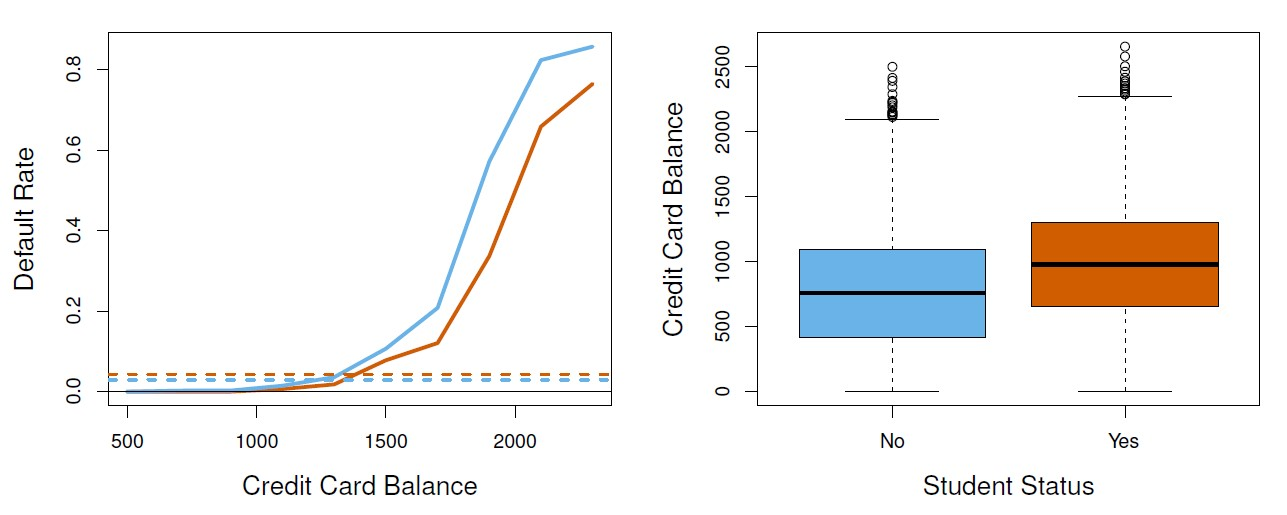

Figure 4.3: Confounding in the Default data. Left: Default rates are shown for students (orange) and non-students (blue). The solid lines display default rate as a function of balance, while the horizontal broken lines display the overall default rates. Right: Boxplots of balance for students (orange) and non-students (blue) are shown.


**Interpreation**
- ``balance``와 ``income``이 고정일 경우: A student is less likely to default than non-student.
- ``studnet`` and ``balance`` : correlated. 학생들이 credit card balance (빚)이 더 높은 경향을 가짐. 
- 그러나 같은 credit card balance 기준으로는 학생이 non-학생보다 default 확률이 더 낮음. 
- 다른 정보가 없다면 학생을 더 risky 하다고 판단했을 것이나 credit card balance에 대한 정보가 있다면 이를 반영했을 시, 같은 빚 기준으로 학생이 default rate 이 더 낮음. Less Risky.


### Further Tune the Logistic Classifier

세개의 변수 모두 사용했을 경우 다음과 같은 값을 가졌다. 
- Accuracy :  0.9732
- Sensitivity :  0.3153153153153153

충분한가? Accuracy 기준으로 봤을 땐 충분히 좋아보인다. 하지만 회사입장에서는 sensitivity가 더 중요. 

분류 기준을 $\hat{Y}=1$ if $P(Y=1|X=x)>thres$ 에서 ``thres`` 를 0.5가 아니라 다른 값으로 바꿔보자. (참고: Bayes classifier 기반의 이론은 0.5일 때 Accuracy 최대)

여기서 Y=1 은 Default = Yes. ``thres``를 0.5보다 크게? 작게?

Default 로 프레딕션을 더 많이 하고자 하니, 이 확률 P(Y=1|X=x)가 조금 낮아도 $\hat{Y}=1$ 으로 프레딕션하자. ``thres``를 낮춰보자.

In [18]:
thres = 0.2
summary_logistic(model, Default['default'], thres)

Confusion Matrix : 
 [[   4 9663]
 [  30  303]]
Accuracy :  0.0307
Sensitivity :  0.9099099099099099
Specificity :  0.0004137788352125789


- Accuracy: 0.97 -> 0.96
- Sensitivity: 0.31 -> 0.61
- Credit Card Company 회사 입장에서, 돈 못갚는 개인을 더 정확하게 식별할 수 있다면 총 정확도의 미미한 감소는 감당할 수 있을 것.

**Note**:
Error rate (1-Accuracy)은 0-1 Loss 기반의 Risk. 이를 minimize 하는 Bayes Classifier 아이디어에서는 확률기준이 0.5임. 이 Tuning 과 관련된 부분은 Domain knoweldge 영향을 받을 수 있음.

In [19]:
grid = np.linspace(0.0001,0.9999, num=200)
accuracy = []
sensitivity =[]
specificity = []
for thres in grid:
    pred = model.predict()
    pred_class = [ "Yes" if x > thres else "No" for x in pred]
    cm1 = confusion_matrix(Default['default'],pred_class) 
    total1=sum(sum(cm1))
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    accuracy.append(accuracy1)
    sensitivity.append(sensitivity1)
    specificity.append(specificity1)
    

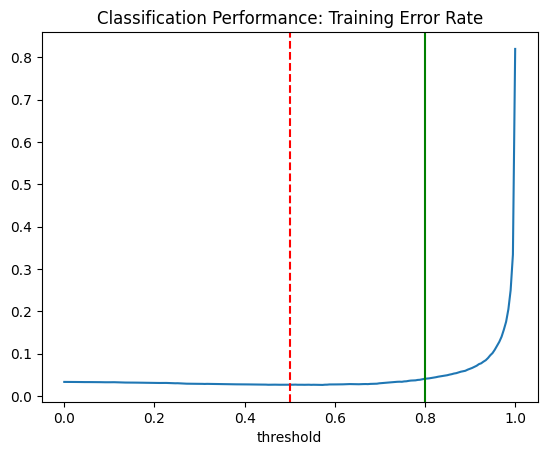

In [20]:
plt.plot(grid, accuracy)

# x=0.5 위치에 수직선 추가
plt.axvline(x=0.5, color='r', linestyle='--')

# x=0.8 위치에 수직선 추가 
plt.axvline(x=0.8, color='g', linestyle='-')


plt.xlabel('threshold')
plt.ylabel('')
plt.title('Classification Performance: Training Error Rate')
plt.show()

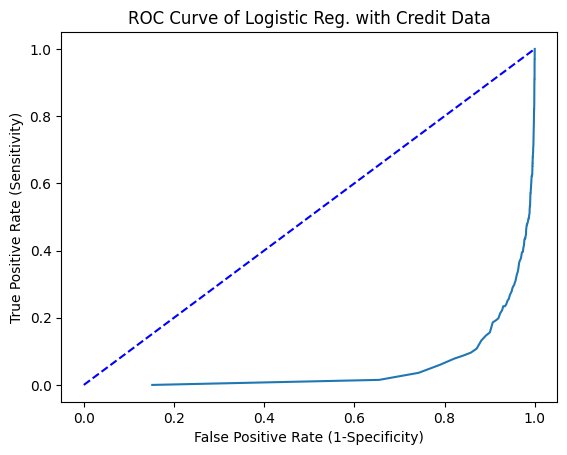

In [21]:
plt.plot(1-np.array(specificity) , sensitivity)
# y=x 직선 추가
x = np.linspace(0, 1, 100) # x 값의 범위 설정
y = x # y=x 직선
plt.plot(x, y, 'b--', label='y=x') # 파란 점선으로 y=x 직선 그리기

plt.title('ROC Curve of Logistic Reg. with Credit Data')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

**ROC Curve (Receiver Operating Characteristic Curve)**

- ROC 곡선은 true positive rate(TPR, 민감도)와 false positive rate(FPR, 1-특이도)의 관계를 나타내는 그래프
- 여기서 TPR은 실제 Positive 샘플 중 모델이 Positive로 예측한 비율
- FPR은 실제 Negative 샘플 중 모델이 Positive로 잘못 예측한 비율
- 곡선이 왼쪽 상단에 가까울수록 모델 성능이 좋음
- 대각선 위의 곡선은 무작위 예측보다 좋은 성능
- 완벽한 모델의 ROC 곡선은 왼쪽 상단 모서리를 지남

**AUC (Area Under the Curve)**
- AUC는 ROC 곡선 아래 면적을 의미
- 0과 1 사이의 값을 가짐. 
- AUC 값이 클수록 모델 성능이 좋음. 예를 들어, AUC가 0.5라면 무작위 예측과 같은 수준, 1.0이라면 완벽한 모델


이제 scikit learn 으로 퍼포먼스 비교 위주로 가보자.

## Comparison with KNN

In [22]:
def class_summary(true_class, pred_class):
    cm1 = confusion_matrix(true_class,pred_class) 
    print('Confusion Matrix : \n', cm1)
    # Note: sensitivity & specificity might be replaced depending on your coding!!
    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    print ('Accuracy : ', accuracy1)

    sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity : ', sensitivity1)

    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity1 )

In [23]:
y = Default['y'].values
X = Default[['std', 'balance','income']]


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

print('Accuracy')

k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)
print(f"{k}-NN Classification:")
class_summary(y,knn.predict(X))

k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print(f"{k}-NN Classification:")
class_summary(y,knn.predict(X))

k=15
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print(f"{k}-NN Classification:")
class_summary(y,knn.predict(X))


Accuracy
2-NN Classification:
Confusion Matrix : 
 [[9667    0]
 [ 231  102]]
Accuracy :  0.9769
Sensitivity :  0.3063063063063063
Specificity :  1.0
5-NN Classification:
Confusion Matrix : 
 [[9648   19]
 [ 231  102]]
Accuracy :  0.975
Sensitivity :  0.3063063063063063
Specificity :  0.9980345505327403
15-NN Classification:
Confusion Matrix : 
 [[9648   19]
 [ 231  102]]
Accuracy :  0.975
Sensitivity :  0.3063063063063063
Specificity :  0.9980345505327403


Stnadardization 비교

In [25]:
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=['std', 'balance','income'])
print('standardized X')
print(X_std.head(5))
print('\n inverse transformation')
print(pd.DataFrame(scaler.inverse_transform(X_std)).head(5))
print('\n Original data before transformation')
print(X.head(5))

standardized X
        std   balance    income
0 -0.645936 -0.218835  0.813187
1  1.548141 -0.037616 -1.605496
2 -0.645936  0.492410 -0.131212
3 -0.645936 -0.632893  0.164031
4 -0.645936 -0.102791  0.370915

 inverse transformation
     0            1             2
0  0.0   729.526495  44361.625074
1  1.0   817.180407  12106.134700
2  0.0  1073.549164  31767.138947
3  0.0   529.250605  35704.493935
4  0.0   785.655883  38463.495879

 Original data before transformation
     std      balance        income
0  False   729.526495  44361.625074
1   True   817.180407  12106.134700
2  False  1073.549164  31767.138947
3  False   529.250605  35704.493935
4  False   785.655883  38463.495879


In [26]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_std, y)
print(f"{k}-NN Classification:")
class_summary(y,knn.predict(X_std))

k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_std, y)
print(f"{k}-NN Classification:")
class_summary(y,knn.predict(X_std))

k=15
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_std, y)
print(f"{k}-NN Classification:")
class_summary(y,knn.predict(X_std))

2-NN Classification:
Confusion Matrix : 
 [[9667    0]
 [ 215  118]]
Accuracy :  0.9785
Sensitivity :  0.35435435435435436
Specificity :  1.0
5-NN Classification:
Confusion Matrix : 
 [[9614   53]
 [ 199  134]]
Accuracy :  0.9748
Sensitivity :  0.4024024024024024
Specificity :  0.9945174304334333
15-NN Classification:
Confusion Matrix : 
 [[9623   44]
 [ 215  118]]
Accuracy :  0.9741
Sensitivity :  0.35435435435435436
Specificity :  0.9954484328126616


## Estimate the test error

지금까지는 training error rate 만 살펴봤다. test 의 경우 어떻게 되는지 확인해보자. 

- 이 데이터는 y=0인 값이 대부분이다. 단순히 random 하게 train/test 를 나눌 경우, 한쪽 그룹에는 y=1 인 값이 거의 없을 가능성도 존재
- k-fold CV 를 진행 할 경우 더욱 문제가 될 수 있다. k-fold cv 안의 train 데이터에 y=1인 값이 없으면 학습이 불가능, valid set 안에 없으면 평가 왜곡
- split 된 데이터가 동등한 y 비율을 갖도록 하자. (예를 들어, 전체 데이터에서 y=1 이 3% 였다면, train 데이터 안의 y=1 도 3%, test 데이터 안의 y=1 도 3%)
- ``stratify`` 옵션 추가

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)
print("Train: ", np.unique(y_train, return_counts=True))
print(266/(266+7734))
print("Test: ", np.unique(y_test, return_counts=True))
print(67/(1933+67))

Train:  (array([False,  True]), array([7734,  266]))
0.03325
Test:  (array([False,  True]), array([1933,   67]))
0.0335


### Logistic Regression with ``sklearn``

- 전체 데이터에 사용해보는 예제
- 확률 기반 분류에서 기본 threshold = 0.5
- 바꾸고 싶은 경우 probability 프레딕션 후 새로 classify

In [28]:
# Logistic Regression with sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logit_class = LogisticRegression(penalty=None)  # negative log-likelihood 뒤에 붙이는 penalty, l2, l1 loss 등

# Training - example
yhat = logit_class.fit(X,y).predict(X)
yhat

array([False, False, False, ..., False, False, False], shape=(10000,))

In [29]:
# Logistic Regression with sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logit_class = LogisticRegression(penalty=None)  # negative log-likelihood 뒤에 붙이는 penalty, l2, l1 loss 등

# Training - example
yhat = logit_class.fit(X,y).predict(X)
print("thres=0.5: ", (yhat==y).mean())
class_summary(y,yhat)

# modify threshold
thres = 0.2
phat = logit_class.fit(X,y).predict_proba(X)[:,1] # class 1 에 대한 확률
yhat = (phat >= thres).astype(int)
print("\n thres=0.2: ",(yhat==y).mean())
class_summary(y,yhat)

thres=0.5:  0.9732
Confusion Matrix : 
 [[9627   40]
 [ 228  105]]
Accuracy :  0.9732
Sensitivity :  0.3153153153153153
Specificity :  0.9958622116478743

 thres=0.2:  0.9593
Confusion Matrix : 
 [[9390  277]
 [ 130  203]]
Accuracy :  0.9593
Sensitivity :  0.6096096096096096
Specificity :  0.9713458156615289


In [30]:
# Report test accuracy, sensitivity, specificity
logreg1 = logit_class
logreg1.fit(X_train,y_train)
yhat = logreg1.predict(X_test)
class_summary(y_test, yhat)

# modify threshold -> predict test
thres = 0.2 
phat = logreg1.predict_proba(X_test)[:,1] # class 1 에 대한 확률
yhat = (phat >= thres).astype(int)
print("\n thres=0.2: ")
class_summary(y_test,yhat)

Confusion Matrix : 
 [[1921   12]
 [  45   22]]
Accuracy :  0.9715
Sensitivity :  0.3283582089552239
Specificity :  0.9937920331091568

 thres=0.2: 
Confusion Matrix : 
 [[1880   53]
 [  25   42]]
Accuracy :  0.961
Sensitivity :  0.6268656716417911
Specificity :  0.9725814795654423


## KNN with K-Fold CV

이번에는 ``cross_val_score`` 를 활용해서 해보자. 기존에는
- ``KFold``: K-개의 subgroup 으로 나누는 용도로만 쓰였으며 가장 자유롭게 작성 가능
- ``GridSearchCV``: parameter들이 여러 조합으로 구성되어 있을 때 파라미터별 grid를 dictioinary 통해서 입력 받아 사용
- ``cross_val_score``: 하나의 parameter에 대해서 할 경우, 단순하고 간편함.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#cross-val-score

**Scoring**
``GridSearchCV``, ``cross_val_score`` 은 scoring 이라는 옵션에 원하는 measure of performance 사용 가능. 
- 일반적으로 regression의 경우 MSE, classification의 경우 accuracy
- scoring을 직접 define 해서 사용 가능
- accuracy, mse 등, Predefined 된 함수들이 있음 https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # X_train 을 scaling 할 때 썼던, training 데이터의 평균값과 표준편차를 사용. - test 값들이 어떤게 들어올지 모름.

# 5-fold 교차 검증을 통해 최적의 k 값을 찾기
k_values = range(1, 25)
cv_scores = []
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, scoring='accuracy', cv=stratified_cv, n_jobs=21)  # cv=k 하면 k-fold CV, cv 값에 cv 클래스 오브젝트 넣는 것도 가능
    #scores = cross_val_score(knn, X_train_scaled, y_train, scoring='recall', cv=stratified_cv, n_jobs=10)  # recall = sensitivity. Does it look good?
    cv_scores.append(scores.mean())

# 최적의 k 값 찾기
best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k)

# 최적의 k 값으로 모델 피팅
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
yhat = knn.predict(X_test_scaled)

# 결과 비교
class_summary(y_test, yhat)

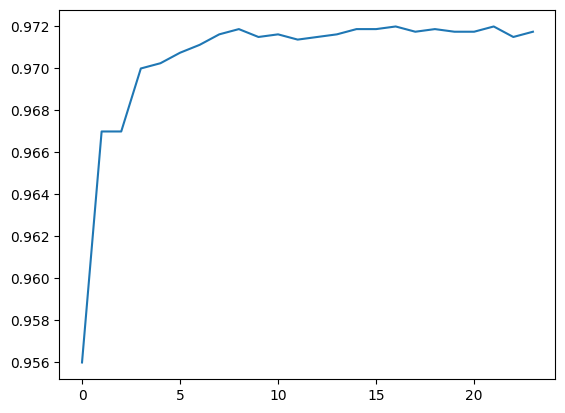

In [ ]:
# 위의 scoring 들은 높을 수록 좋은 것 (loss 와 반대)
plt.plot(cv_scores)